In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from pyimcom.config import Config, Settings as Stn
from pyimcom.coadd import Block
from pyimcom.analysis import OutImage

In [2]:
cfg = Config()
cfg.extrainput = [None, 'whitenoise1', '1fnoise2', 'cstar14']
# cfg.extrainput = [None]
cfg.n_inframe = len(cfg.extrainput)
# cfg.stoptile = 4
cfg.pad_sides = 'all'

cfg.fade_kernel = 3
cfg.n2f = cfg.n2 + cfg.fade_kernel * 2
cfg.instamp_pad = 1.25 * Stn.arcsec
cfg.linear_algebra = 'Cholesky'
cfg.kappaC_arr = np.array([2e-4])

blk = Block(cfg=cfg, this_sub=0, run_coadd=False)
blk.parse_config()
blk.process_input_images(visualize=False)
blk.build_input_stamps()
blk.coadd_output_stamps(sim_mode=True)

General input information:
number of input frames =  4 type = [None, 'whitenoise1', '1fnoise2', 'cstar14']
acceptance radius --> 1.250000 arcsec or 50.000000 output pixels

Getting observations from /users/PCON0003/cond0007/imcom/coadd-test-fall2022/observing_sequence_hls_06_21.fits
Retrieved columns: ['date', 'exptime', 'constraint', 'ra', 'dec', 'pa', 'program', 'filter', 'gal_lon', 'gal_lat', 'ec_lon', 'ec_lat', 'sun_ang_los', 'rol_ang_sun', 'earth_ang_los', 'roll_ang_earth', 'zodi_bright', 'EBV', 'slew_ang_from', 'slew_ang_to', 'yaw', 'comment']  175032 rows
Output information: ctr at RA= 53.000000,DEC=-40.000000
pixel scale=0.025000 arcsec or 6.94444E-06 degree
output array size = 2600 (52 postage stamps of 50)

sub-block    0 < 0, 0> of 48x48=2304
outputs directed to --> /users/PAS2055/kailicao/pyimcom_dev/test/test4C_Yband_00_00
temporary storage directed to --> /tmp/kailicao-tempy_0000_20240601213851698563_cache
0 [[ 53.52615519 -40.39950529]]
1 [[ 53.50244699 -40.3996099 ]]
2 

# Postage stamp coaddition (coadd.py)

In [3]:
if False:
    outst = blk.outstamps[1][1]
    outst._process_input_stamps(visualize=True)
    outst(visualize=True, save_abc=True, save_t=True)

# PSF arrays and overlaps (psfutil.py)

In [4]:
from pyimcom.psfutil import PSFGrp, PSFOvl
try:
    from pyimcom_croutines import iD5512C, iD5512C_sym, gridD5512C
except:
    from .routine import iD5512C, iD5512C_sym, gridD5512C
from pyimcom.analysis import OutImage

output PSF: 0


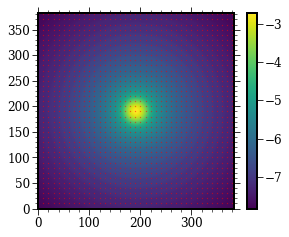

In [5]:
outpsfgrp = PSFGrp(in_or_out=False, blk=blk, visualize=True)

INPUT/PSF computation at RA= 53.5262, Dec=-40.3995; The PSF below is from InImage (95060, 12) at the upper right corner of InStamp (0, 0)


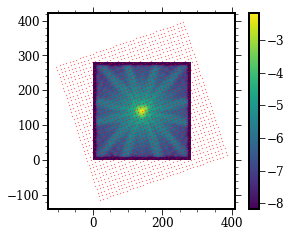

The PSF below is from InImage (95061, 12) at the upper right corner of InStamp (0, 0)


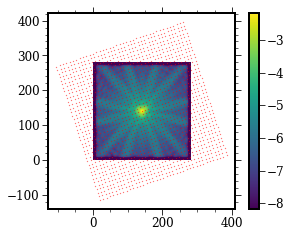

The PSF below is from InImage (95062, 3) at the upper right corner of InStamp (0, 0)


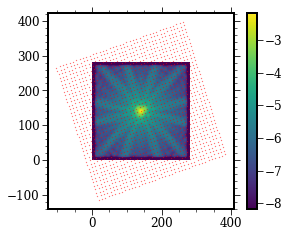

The PSF below is from InImage (132152, 12) at the upper right corner of InStamp (0, 0)


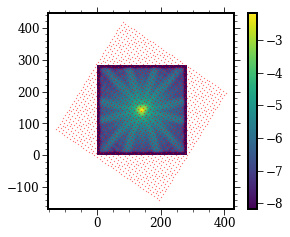

The PSF below is from InImage (132153, 12) at the upper right corner of InStamp (0, 0)


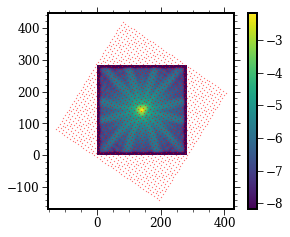

The PSF below is from InImage (132154, 12) at the upper right corner of InStamp (0, 0)


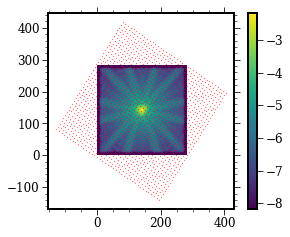

using input exposures: [0, 2, 3, 4, 5, 6]
INPUT/PSF computation at RA= 53.5252, Dec=-40.3995; using input exposures: [0, 2, 3, 4, 5, 6]


In [6]:
inpsfgrp00 = PSFGrp(in_or_out=True, inst=blk.instamps[0][0], visualize=True)
inpsfgrp02 = PSFGrp(in_or_out=True, inst=blk.instamps[0][2], visualize=False)

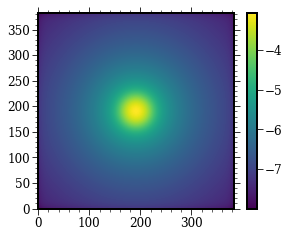

In [7]:
outpsfovl = PSFOvl(outpsfgrp, visualize=True)

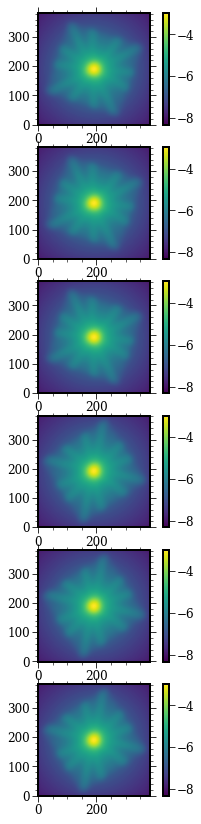

In [8]:
iopsfovl = PSFOvl(inpsfgrp00, outpsfgrp, visualize=True)

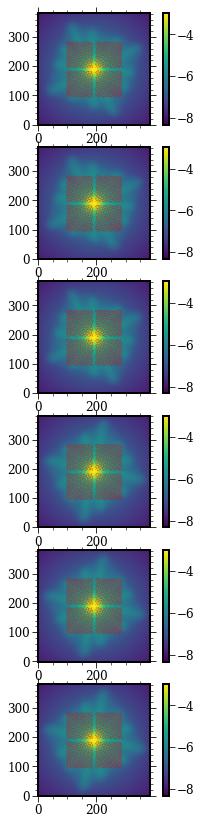

In [9]:
_ = iopsfovl(blk.instamps[1][1], blk.outstamps[1][1], visualize=True)

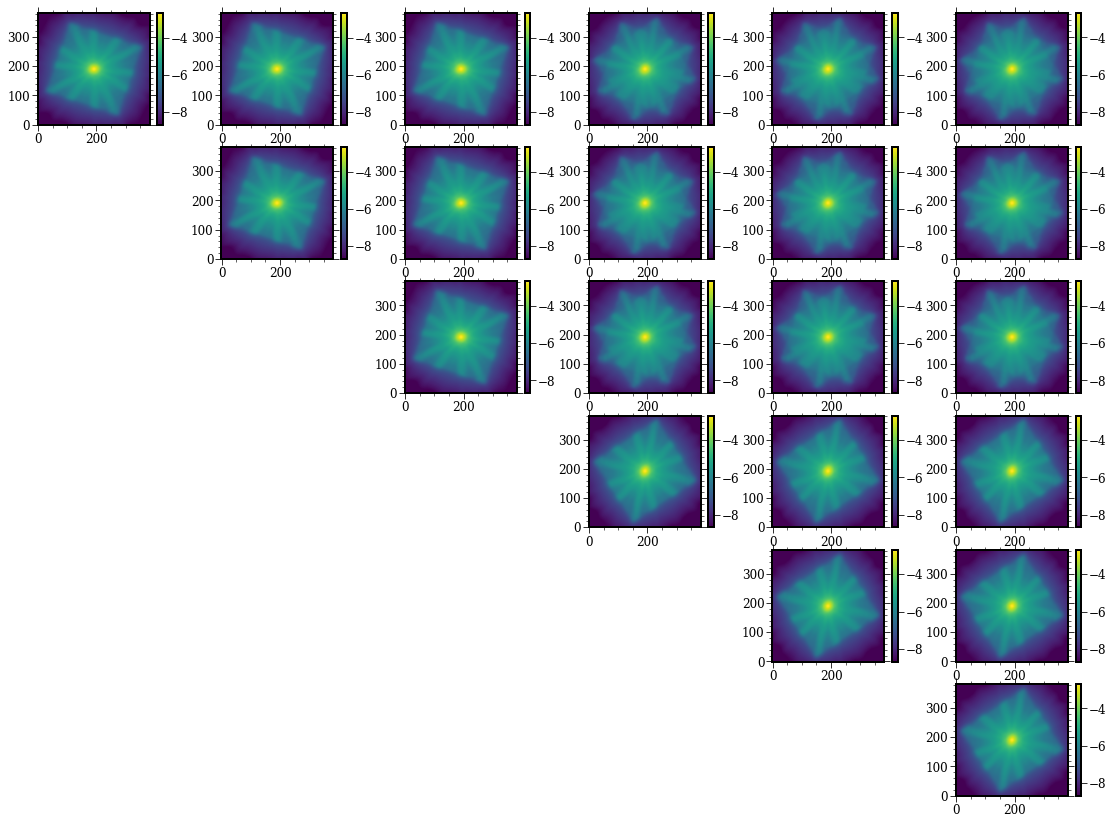

In [10]:
inpsfovl_s = PSFOvl(inpsfgrp00, visualize=True)  # _s: self

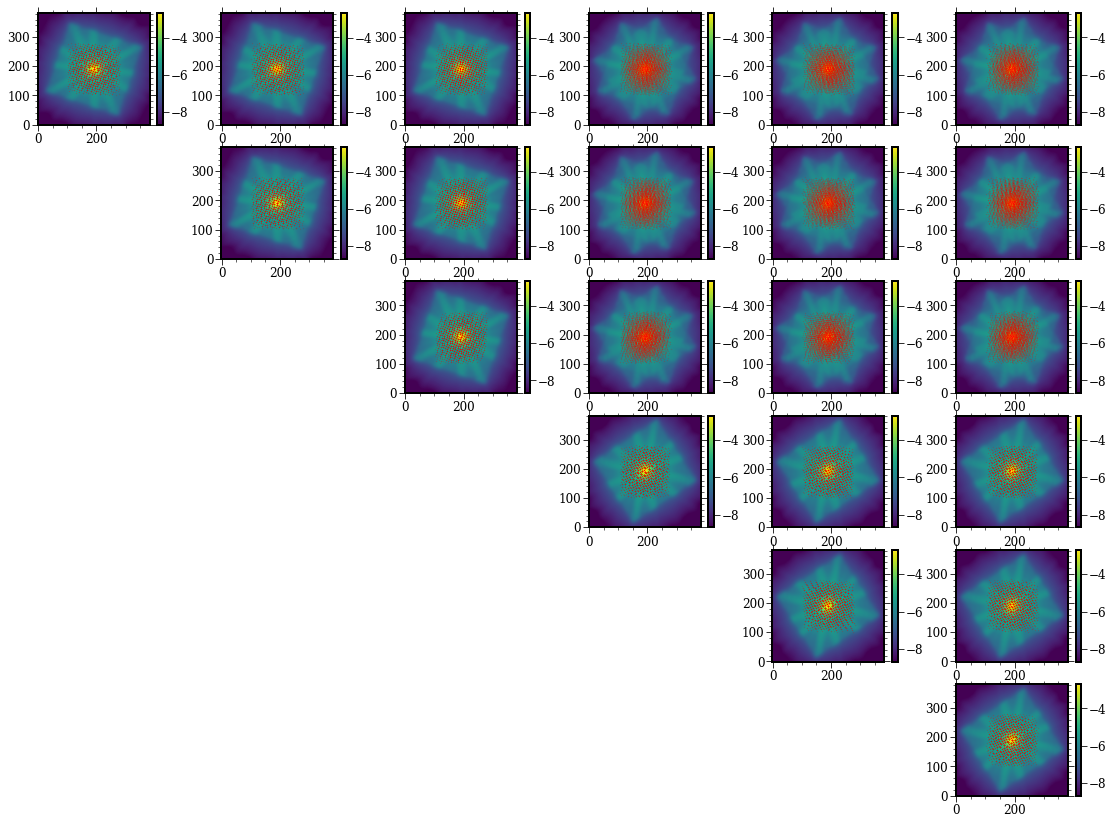

In [11]:
_ = inpsfovl_s(blk.instamps[1][1], None, visualize=True)

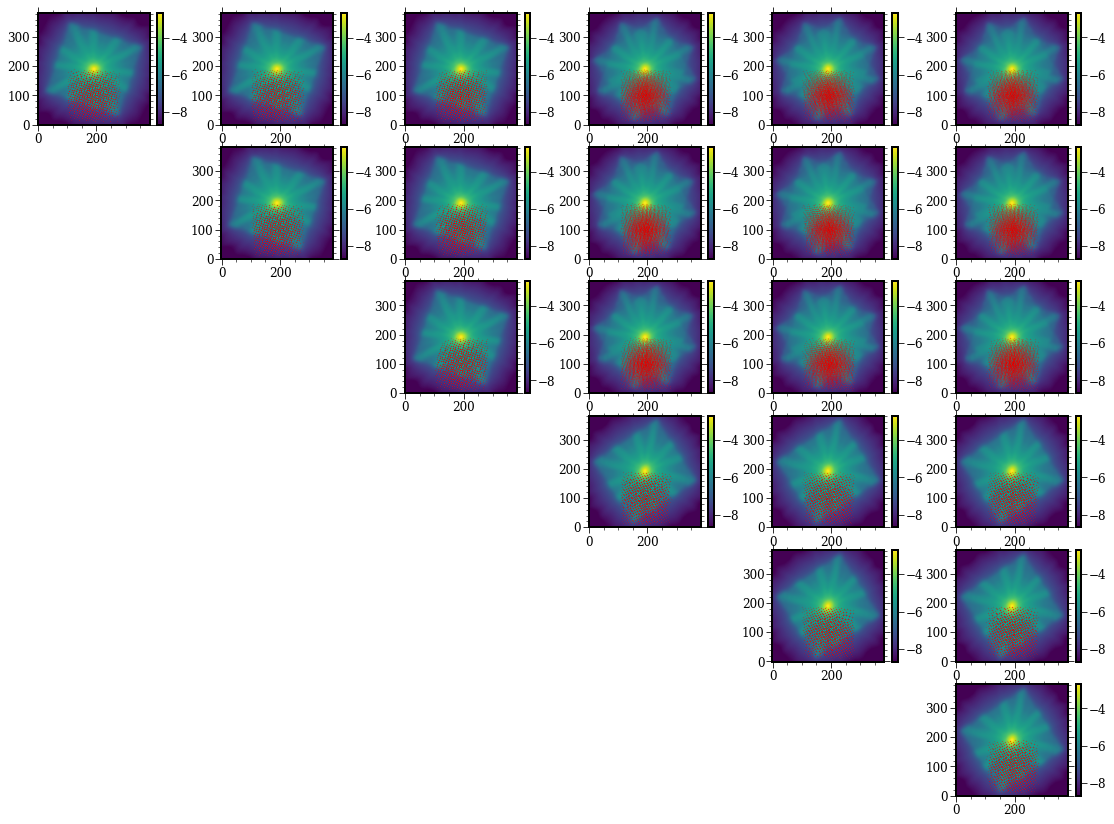

In [12]:
_ = inpsfovl_s(blk.instamps[0][1], blk.instamps[1][1], visualize=True)

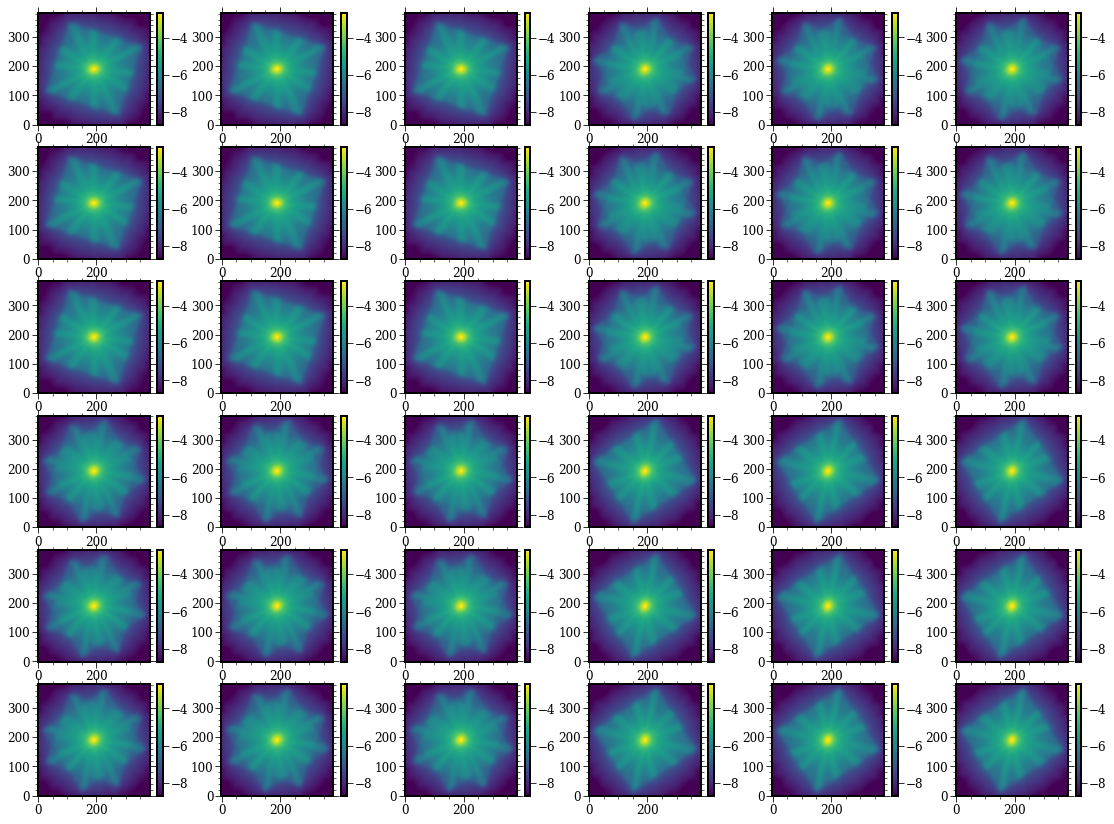

In [13]:
inpsfovl_c = PSFOvl(inpsfgrp00, inpsfgrp02, visualize=True)  # _c: cross

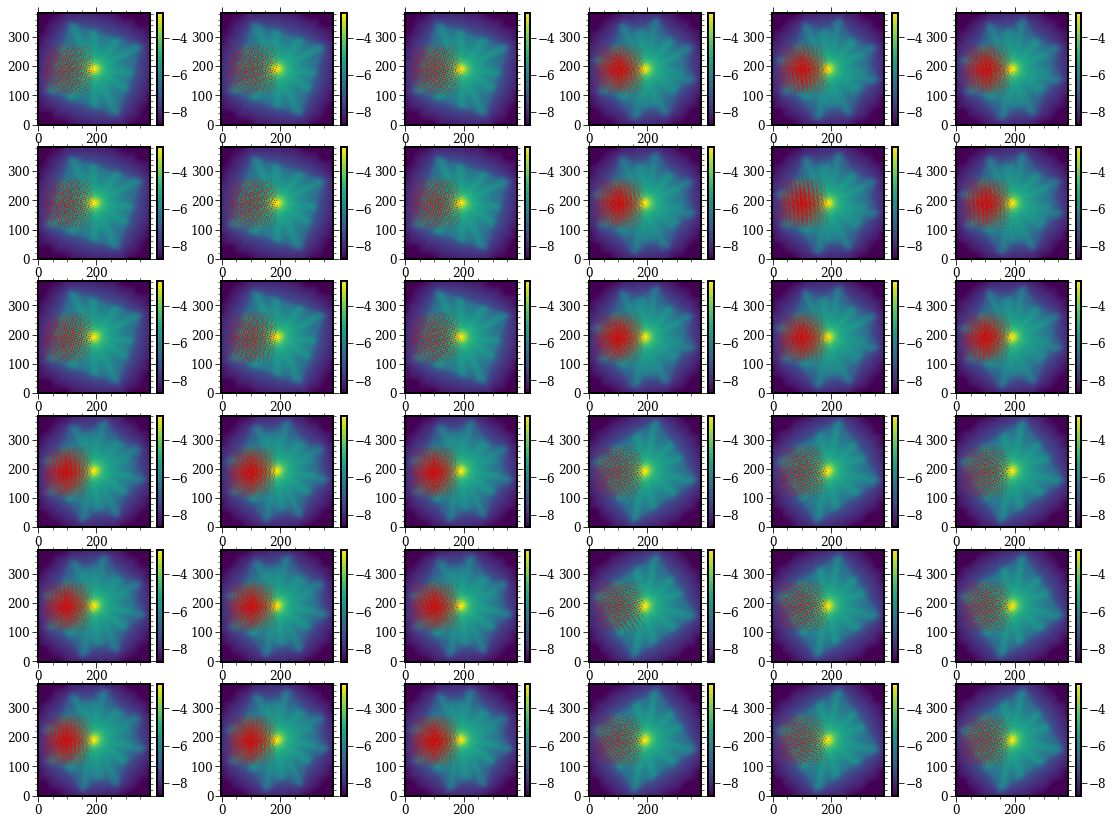

In [14]:
_ = inpsfovl_c(blk.instamps[1][1], blk.instamps[1][2], visualize=True)